## **Load and Inspect Crime Data (2024)**



In [ ]:
import pandas as pd

crime_data_url = 'https://data.cityofchicago.org/resource/ijzp-q8t2.csv?$where=year=2024'

crime_data = pd.read_csv(crime_data_url)

crime_data.head()


,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,13709672,JJ101940,2024-12-31T23:58:00.000,014XX E 68TH ST,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,...,5,43,14,1186817,1860189,2024,2025-01-08T15:42:09.000,41.771470,-87.590742,"\n, \n(41.771470188, -87.59074212)"
1,13707925,JJ100089,2024-12-31T23:56:00.000,047XX S DR MARTIN LUTHER KING JR DR,1365,CRIMINAL TRESPASS,TO RESIDENCE,APARTMENT,True,True,...,3,38,26,1179661,1873623,2024,2025-01-08T15:42:09.000,41.808501,-87.616563,"\n, \n(41.808500903, -87.616562762)"
2,13708038,JJ100035,2024-12-31T23:55:00.000,077XX S CICERO AVE,0498,BATTERY,"AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SE...",HOTEL / MOTEL,False,True,...,18,70,04B,1145740,1853048,2024,2025-01-08T15:42:09.000,41.752749,-87.741498,"\n, \n(41.752748627, -87.741497836)"
3,13709164,JJ101392,2024-12-31T23:53:00.000,066XX S GREENWOOD AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,20,42,14,1184362,1861188,2024,2025-01-08T15:42:09.000,41.774269,-87.599710,"\n, \n(41.774269351, -87.599709962)"
4,13707823,JJ100020,2024-12-31T23:50:00.000,012XX N MENARD AVE,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,29,25,08B,1137458,1907694,2024,2025-01-08T15:42:09.000,41.902858,-87.770537,"\n, \n(41.902858242, -87.770536741)"


# **Load and Inspect Neighborhoods GeoJSON**

In [ ]:
import geopandas as gpd

neighborhoods_url = 'https://data.cityofchicago.org/resource/igwz-8jzy.geojson'

neighborhoods = gpd.read_file(neighborhoods_url)

neighborhoods.head()


,community,area,shape_area,perimeter,area_num_1,area_numbe,comarea_id,comarea,shape_len,geometry
0,DOUGLAS,0,46004621.1581,0,35,35,0,0,31027.0545098,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ..."
1,OAKLAND,0,16913961.0408,0,36,36,0,0,19565.5061533,"MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ..."
2,FULLER PARK,0,19916704.8692,0,37,37,0,0,25339.0897503,"MULTIPOLYGON (((-87.6288 41.80189, -87.62879 4..."
3,GRAND BOULEVARD,0,48492503.1554,0,38,38,0,0,28196.8371573,"MULTIPOLYGON (((-87.60671 41.81681, -87.6067 4..."
4,KENWOOD,0,29071741.9283,0,39,39,0,0,23325.1679062,"MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ..."


# **Convert Crime Data to GeoDataFrame**

In [ ]:
from shapely.geometry import Point

crime_data = crime_data.dropna(subset=['latitude', 'longitude'])

geometry = [Point(xy) for xy in zip(crime_data['longitude'], crime_data['latitude'])]

crime_gdf = gpd.GeoDataFrame(crime_data, geometry=geometry, crs='EPSG:4326')

crime_gdf.head()


,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location,geometry
0,13709672,JJ101940,2024-12-31T23:58:00.000,014XX E 68TH ST,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,...,43,14,1186817,1860189,2024,2025-01-08T15:42:09.000,41.771470,-87.590742,"\n, \n(41.771470188, -87.59074212)",POINT (-87.59074 41.77147)
1,13707925,JJ100089,2024-12-31T23:56:00.000,047XX S DR MARTIN LUTHER KING JR DR,1365,CRIMINAL TRESPASS,TO RESIDENCE,APARTMENT,True,True,...,38,26,1179661,1873623,2024,2025-01-08T15:42:09.000,41.808501,-87.616563,"\n, \n(41.808500903, -87.616562762)",POINT (-87.61656 41.8085)
2,13708038,JJ100035,2024-12-31T23:55:00.000,077XX S CICERO AVE,0498,BATTERY,"AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SE...",HOTEL / MOTEL,False,True,...,70,04B,1145740,1853048,2024,2025-01-08T15:42:09.000,41.752749,-87.741498,"\n, \n(41.752748627, -87.741497836)",POINT (-87.7415 41.75275)
3,13709164,JJ101392,2024-12-31T23:53:00.000,066XX S GREENWOOD AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,42,14,1184362,1861188,2024,2025-01-08T15:42:09.000,41.774269,-87.599710,"\n, \n(41.774269351, -87.599709962)",POINT (-87.59971 41.77427)
4,13707823,JJ100020,2024-12-31T23:50:00.000,012XX N MENARD AVE,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,25,08B,1137458,1907694,2024,2025-01-08T15:42:09.000,41.902858,-87.770537,"\n, \n(41.902858242, -87.770536741)",POINT (-87.77054 41.90286)


# **Spatial Join: Assign Neighborhoods to Crimes**

In [ ]:
neighborhoods = neighborhoods.to_crs(crime_gdf.crs)


crime_with_neighborhoods = gpd.sjoin(crime_gdf, neighborhoods, how='left', predicate='within')


crime_with_neighborhoods = crime_with_neighborhoods.rename(columns={'community': 'neighborhood'})


crime_with_neighborhoods[['case_number', 'primary_type', 'description', 'neighborhood']].head()


,case_number,primary_type,description,neighborhood
0,JJ101940,CRIMINAL DAMAGE,TO PROPERTY,SOUTH SHORE
1,JJ100089,CRIMINAL TRESPASS,TO RESIDENCE,GRAND BOULEVARD
2,JJ100035,BATTERY,"AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SE...",ASHBURN
3,JJ101392,CRIMINAL DAMAGE,TO VEHICLE,WOODLAWN
4,JJ100020,BATTERY,SIMPLE,AUSTIN


# **Group Crimes by Neighborhood**

In [ ]:
crime_counts = crime_with_neighborhoods.groupby('neighborhood').size().reset_index(name='crime_count')

neighborhoods = neighborhoods.rename(columns={'community': 'neighborhood'})
neighborhoods = neighborhoods.merge(crime_counts, on='neighborhood', how='left')

neighborhoods['crime_count'] = neighborhoods['crime_count'].fillna(0)

neighborhoods[['neighborhood', 'crime_count']].head()


,neighborhood,crime_count
0,DOUGLAS,6.0
1,OAKLAND,2.0
2,FULLER PARK,3.0
3,GRAND BOULEVARD,24.0
4,KENWOOD,10.0


# **Plot Crime Count by Neighborhood**

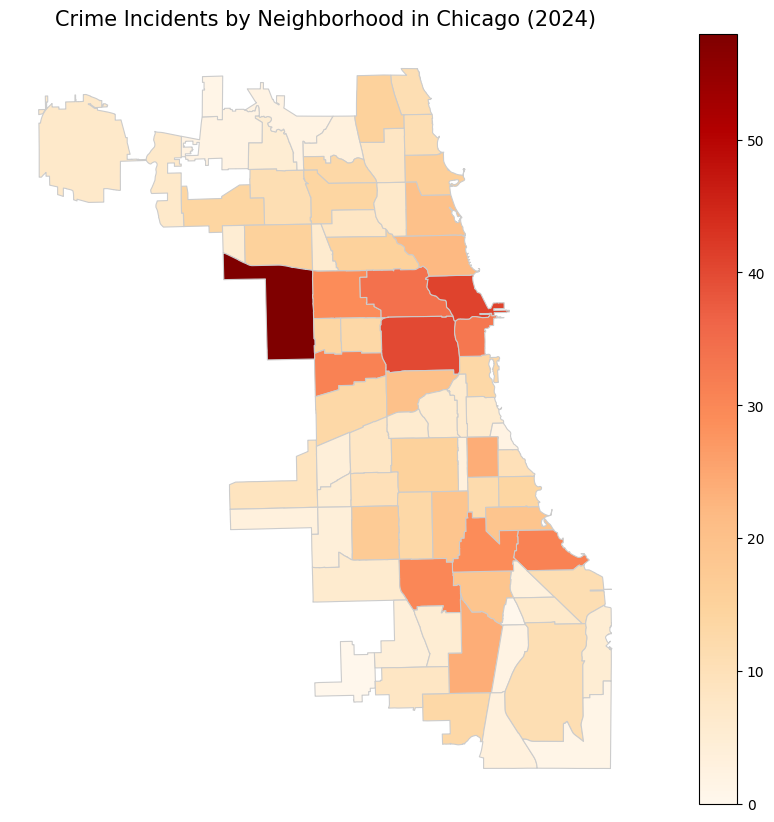

In [ ]:
import matplotlib.pyplot as plt

# Plot
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
neighborhoods.plot(column='crime_count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Crime Incidents by Neighborhood in Chicago (2024)', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.axis('off')
plt.show()


# **Reproject and Calculate Centroids**

In [ ]:
neighborhoods_proj = neighborhoods.to_crs(epsg=26971)

neighborhoods_proj['centroid'] = neighborhoods_proj.geometry.centroid

neighborhoods_proj[['neighborhood', 'centroid']].head()


,neighborhood,centroid
0,DOUGLAS,POINT (359361.051 574036.276)
1,OAKLAND,POINT (360656.073 572784.474)
2,FULLER PARK,POINT (358242.793 571135.372)
3,GRAND BOULEVARD,POINT (359449.509 571574.568)
4,KENWOOD,POINT (361254.473 571141.892)


In [ ]:
neighborhoods = neighborhoods_proj.to_crs(epsg=4326)



# **K-Nearest Neighbors Graph Construction**

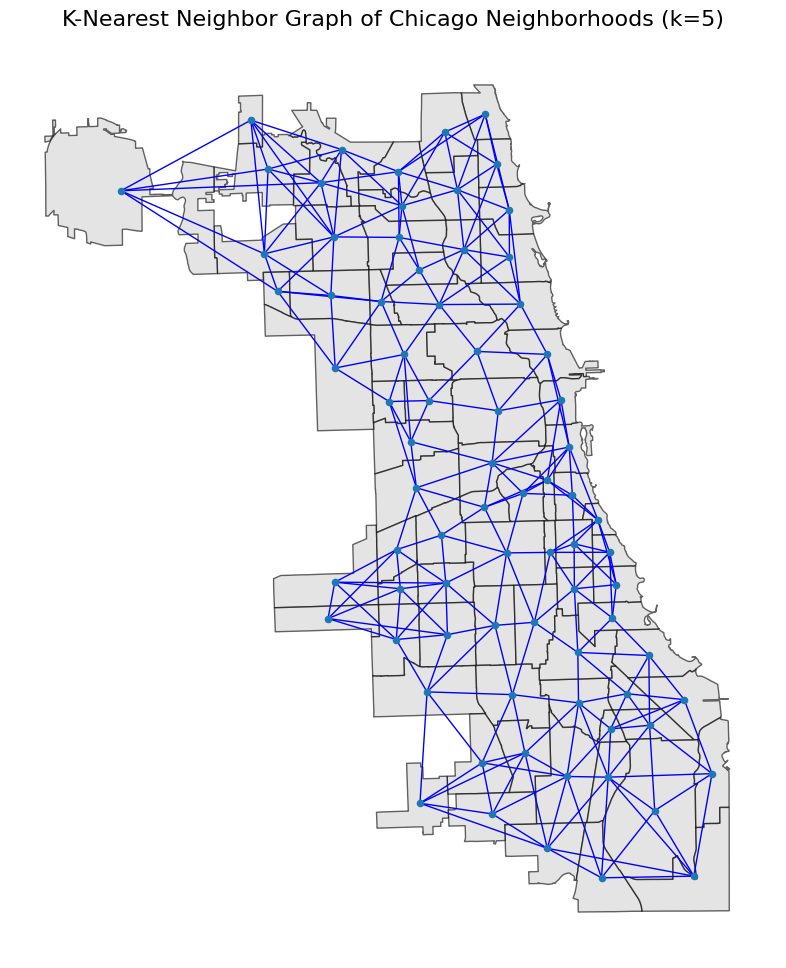

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

centroids_coords = np.array([[point.x, point.y] for point in neighborhoods_proj['centroid']])
nbrs = NearestNeighbors(n_neighbors=6, algorithm='ball_tree').fit(centroids_coords)
distances, indices = nbrs.kneighbors(centroids_coords)

G = nx.Graph()

for i, (x, y) in enumerate(centroids_coords):
    G.add_node(i, pos=(x, y))


for i, neighbors in enumerate(indices):
    for j in neighbors[1:]:
        G.add_edge(i, j)

fig, ax = plt.subplots(figsize=(15, 12))

neighborhoods_proj.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.6)

pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, ax=ax, node_size=20, edge_color='blue')

ax.set_title('K-Nearest Neighbor Graph of Chicago Neighborhoods (k=5)', fontsize=16)
ax.axis('off')
plt.show()


In [ ]:
!pip install mpld3 -q



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 9.8 MB/s eta 0:00:00


# **Export Interactive Graph Map (HTML)**

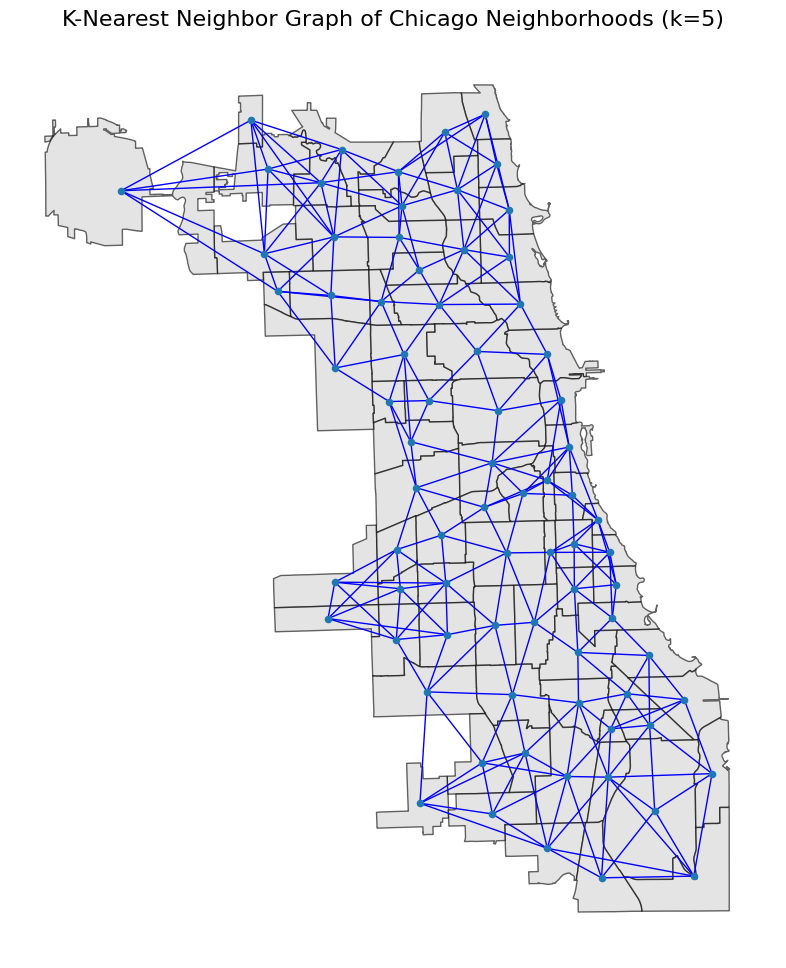

In [30]:
import matplotlib.pyplot as plt
import mpld3
import networkx as nx
import matplotlib

matplotlib._api.warn_deprecated = lambda *args, **kwargs: None


fig, ax = plt.subplots(figsize=(15, 12))
neighborhoods_proj.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.6)

nx.draw(G, pos, ax=ax, node_size=20, edge_color='blue')

ax.set_title('K-Nearest Neighbor Graph of Chicago Neighborhoods (k=5)', fontsize=16)
ax.axis('off')

html_str = mpld3.fig_to_html(fig)
with open("chicago_knn_map.html", "w") as f:
    f.write(html_str)
